# 6.5 Machine Learning Part 2

## Contents:

#### 1. Importing libraries and data and data preprocessing
#### 2. Standardizing Data
#### 3. The elbow technique
#### 4. K-means clustering

## 1. Importing libraries and data and data preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

In [2]:
#Display the graph without the need to "call" it specifically
%matplotlib inline

In [3]:
path = 'C:/Users/midov/Documents/Studies/Data Analysis/Immersion into Data Analytics/Achievement 6_Advanced Analytics & Dashboard Design/Causes of Death Analysis'

In [4]:
#Import data 
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data','df_merged_all3.csv'))

In [5]:
df.shape

(6771, 41)

In [6]:
df.head()

,Unnamed: 0,Country,Year,Meningitis,Alzheimer_s_Disease_and_Other_Dementias,Parkinson_s_Disease,Nutritional_Deficiencies,Malaria,Drowning,Interpersonal_Violence,...,Digestive_Diseases,Fire_Heat_and_Hot_Substances,Acute_Hepatitis,Total_no_of_Deaths,Indicator,Sex,Age Group,Number,Death_indicator,Health_expedinture
0,1,Australia,2009,49,8064,1837,137,0,207,339,...,5186,266,12,269843.56,8.56,All,[0],1261,Low,Middle
1,2,Australia,2009,49,8064,1837,137,0,207,339,...,5186,266,12,268813.56,8.56,All,[1-4],230,Low,Middle
2,3,Australia,2009,49,8064,1837,137,0,207,339,...,5186,266,12,268718.56,8.56,All,[5-9],134,Low,Middle
3,4,Australia,2009,49,8064,1837,137,0,207,339,...,5186,266,12,268736.56,8.56,All,[10-14],151,Low,Middle
4,5,Australia,2009,49,8064,1837,137,0,207,339,...,5186,266,12,269121.56,8.56,All,[15-19],535,Low,Middle


In [7]:
#Remove categorical variables and not necessary variables
df1 = df.drop(columns =['Country','Sex','Death_indicator','Age Group','Health_expedinture','Year','Meningitis','Parkinson_s_Disease',
                       'Nutritional_Deficiencies','Malaria','Drowning','Interpersonal_Violence','Maternal_Disorders','HIV_AIDS',
                       'Drug_Use_Disorders','Tuberculosis','Neonatal_Disorders','Alcohol_Use_Disorders','Self_harm','Exposure_to_Forces_of_Nature',
                       'Diarrheal_Diseases','Environmental_Heat_and_Cold_Exposure','Conflict_and_Terrorism','Chronic_Kidney_Disease',
                       'Poisonings','Protein_Energy_Malnutrition','Road_Injuries','Cirrhosis_and_Other_Chronic_Liver_Diseases',
                       'Fire_Heat_and_Hot_Substances','Acute_Hepatitis','Digestive_Diseases','Lower_Respiratory_Infections','Diabetes_Mellitus',
                       'Indicator','Number'])

In [8]:
df1

,Unnamed: 0,Alzheimer_s_Disease_and_Other_Dementias,Cardiovascular_Diseases,Neoplasms,Chronic_Respiratory_Diseases,Total_no_of_Deaths
0,1,8064,45219,43523,8342,269843.56
1,2,8064,45219,43523,8342,268813.56
2,3,8064,45219,43523,8342,268718.56
3,4,8064,45219,43523,8342,268736.56
4,5,8064,45219,43523,8342,269121.56
...,...,...,...,...,...,...
6766,7479,143919,957455,773895,224988,5841652.77
6767,7480,143919,957455,773895,224988,5870017.77
6768,7481,143919,957455,773895,224988,5891177.77
6769,7482,143919,957455,773895,224988,5918111.77


In [9]:
#Check for null values
df1.isnull().sum()

Unnamed: 0                                 0
Alzheimer_s_Disease_and_Other_Dementias    0
Cardiovascular_Diseases                    0
Neoplasms                                  0
Chronic_Respiratory_Diseases               0
Total_no_of_Deaths                         0
dtype: int64

## 2. Standardizing Data

In [10]:
#Use Standard Scaler to standardize data in the dataframe
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df1)
print(standardized_data)

[[-1.7315485  -0.70913232 -0.59492556 -0.57675019 -0.47347644 -0.64699407]
 [-1.7310857  -0.70913232 -0.59492556 -0.57675019 -0.47347644 -0.64718752]
 [-1.73062291 -0.70913232 -0.59492556 -0.57675019 -0.47347644 -0.64720536]
 ...
 [ 1.73015895  1.19817729  0.19423383  0.51061687  0.21854735  0.40880177]
 [ 1.73062174  1.19817729  0.19423383  0.51061687  0.21854735  0.4138605 ]
 [ 1.73108454  1.19817729  0.19423383  0.51061687  0.21854735  0.48065886]]


In [11]:
#Employ PCA to find a subset of components, which explain the varience in the data
pca = PCA()
pca.fit(standardized_data)

PCA()

In [12]:
#Show how much variance is explained by each of the four components
pca.explained_variance_ratio_

array([8.14410954e-01, 1.69922662e-01, 1.08416828e-02, 4.38714140e-03,
       3.84210985e-04, 5.33490958e-05])

Text(0, 0.5, 'Cumulative Explained Variance')

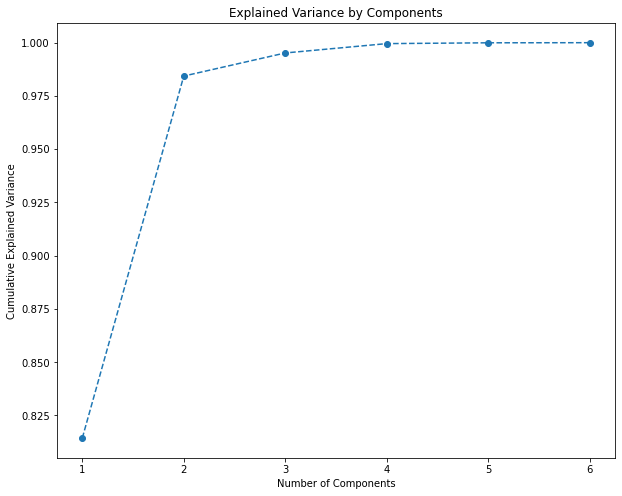

In [13]:
#Plot the cumulative variance explained by total number of components
plt.figure(figsize = (10,8))
plt.plot(range (1,7), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [14]:
#Choice of two components based on the above findings
pca = PCA(n_components = 2)

In [15]:
#Fit model to data
pca.fit(standardized_data)

PCA(n_components=2)

In [16]:
#Extract calculated resulting components for the data set
pca.transform(standardized_data)

array([[-1.34390694, -1.73612274],
       [-1.3439936 , -1.73566303],
       [-1.34400099, -1.7352048 ],
       ...,
       [ 1.12821594,  1.82012044],
       [ 1.13050014,  1.8205361 ],
       [ 1.16065402,  1.8204339 ]])

In [17]:
scores_pca = pca.transform(standardized_data)

## 3. The elbow technique

In [18]:
#Define the range of potential clusters in the data and k-means clusters in the range assigned
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [19]:
score = [kmeans[i].fit(scores_pca).score(scores_pca) for i in range(len(kmeans))]

In [20]:
score

[-39989.537471868076,
 -9247.559761775203,
 -3625.145758385362,
 -1721.4605365825294,
 -1029.794483678564,
 -788.383018499771,
 -571.9471870744752,
 -390.8347013171967,
 -261.3102782676916]

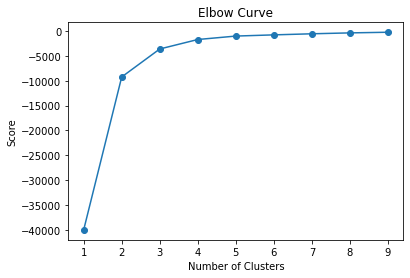

In [21]:
#Plot elbow curve
pl.plot(num_cl,score, marker = 'o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title ('Elbow Curve')
pl.show()

##### The last big jump between 2 and 3 shows that the optimal count for the clusters is 3. After 3 the line on the x-axis straightens out.

## 4. K-means clustering

In [22]:
#Create the k-means object
kmeans = KMeans(n_clusters = 3) 

In [23]:
#Fit the k-means object to the data.
kmeans.fit(df1)

KMeans(n_clusters=3)

In [24]:
#Create a column in df1 with values corresponding to which cluster every observation belongs
df1['Clusters'] = kmeans.fit_predict(df1)

In [25]:
df1.head()

,Unnamed: 0,Alzheimer_s_Disease_and_Other_Dementias,Cardiovascular_Diseases,Neoplasms,Chronic_Respiratory_Diseases,Total_no_of_Deaths,Clusters
0,1,8064,45219,43523,8342,269843.56,2
1,2,8064,45219,43523,8342,268813.56,2
2,3,8064,45219,43523,8342,268718.56,2
3,4,8064,45219,43523,8342,268736.56,2
4,5,8064,45219,43523,8342,269121.56,2


In [26]:
#Create a new Segment column for easier cluster readabilty
df1['Segment'] = df1 ['Clusters'].map({0: 'first', 
                                            1: 'second', 
                                            2: 'third', 
                                            3: 'fourth'})

In [27]:
df1.head()

,Unnamed: 0,Alzheimer_s_Disease_and_Other_Dementias,Cardiovascular_Diseases,Neoplasms,Chronic_Respiratory_Diseases,Total_no_of_Deaths,Clusters,Segment
0,1,8064,45219,43523,8342,269843.56,2,third
1,2,8064,45219,43523,8342,268813.56,2,third
2,3,8064,45219,43523,8342,268718.56,2,third
3,4,8064,45219,43523,8342,268736.56,2,third
4,5,8064,45219,43523,8342,269121.56,2,third


In [28]:
df1['Segment'].value_counts()

third     4814
first     1273
second     684
Name: Segment, dtype: int64

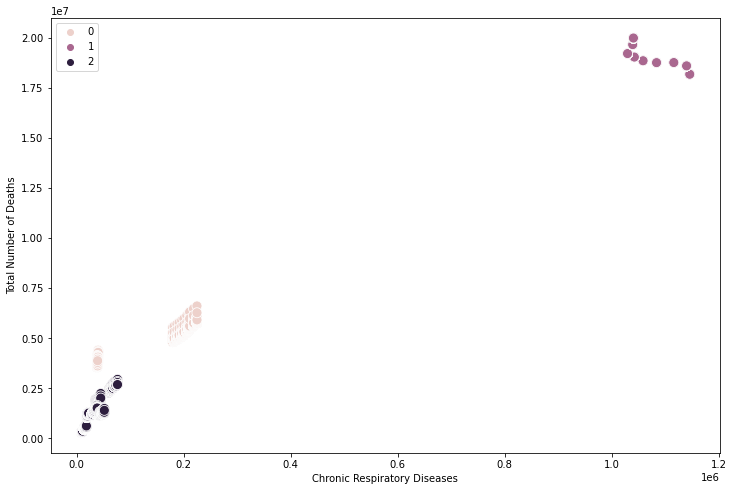

In [29]:
# Plot the clusters for the "Chronic_Respiratory_Diseases" and "Total_no_of_Deaths" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Chronic_Respiratory_Diseases'], y=df1['Total_no_of_Deaths'], hue=kmeans.labels_, s=100) 
#Here, I'm subsetting `X` for the x and y arguments to avoid using their labels. 
#`hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
#`s` represents the size of the points we want to see in the plot.

ax.grid(False) #Removes the grid from the background
plt.xlabel('Chronic Respiratory Diseases') #Label x-axis
plt.ylabel('Total Number of Deaths') #Label y-axis
plt.show()

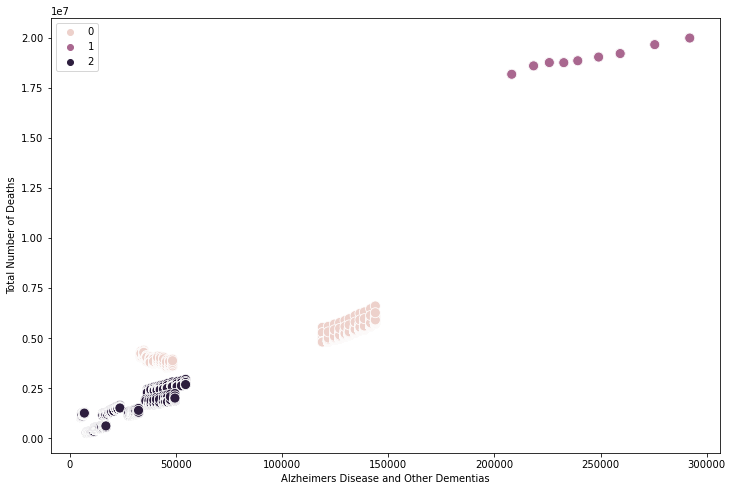

In [30]:
# Plot the clusters for the "Alzheimer_s_Disease_and_Other_Dementias" and "Total_no_of_Deaths" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Alzheimer_s_Disease_and_Other_Dementias'], y=df1['Total_no_of_Deaths'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Alzheimers Disease and Other Dementias') 
plt.ylabel('Total Number of Deaths')
plt.show()

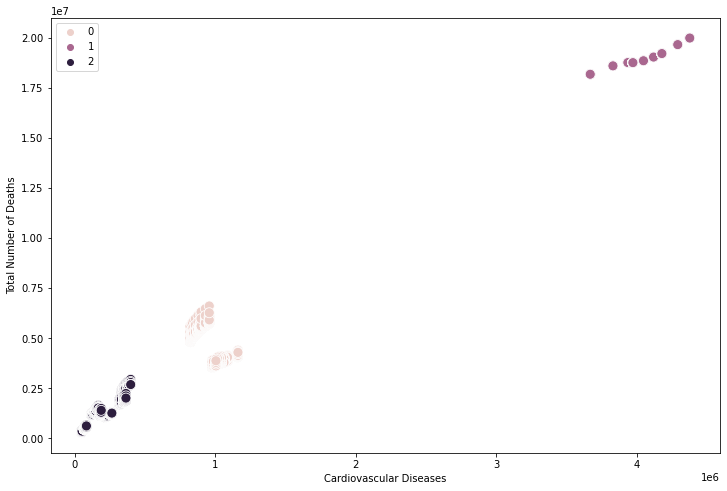

In [31]:
# Plot the clusters for the "Cardiovascular_Diseases" and "Total_no_of_Deaths" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Cardiovascular_Diseases'], y=df1['Total_no_of_Deaths'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Cardiovascular Diseases') 
plt.ylabel('Total Number of Deaths') 
plt.show()

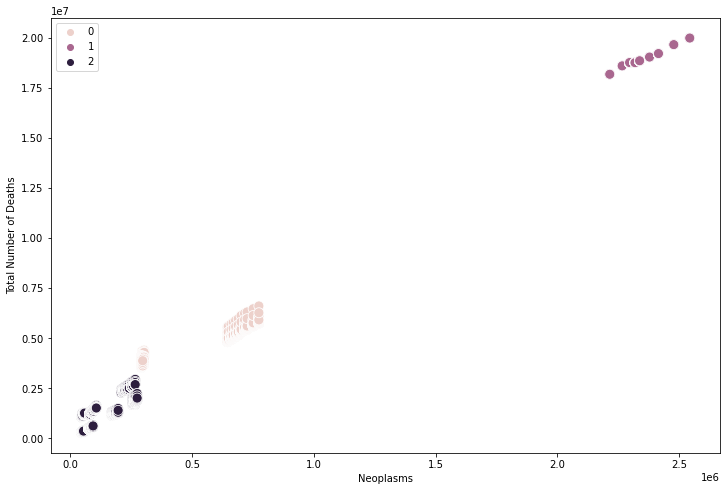

In [32]:
# Plot the clusters for the "Neoplasms" and "Total_no_of_Deaths" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Neoplasms'], y=df1['Total_no_of_Deaths'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Neoplasms') 
plt.ylabel('Total Number of Deaths') 
plt.show()

##### The graphs make sense showing, for example, that cluster 2 contributes to the total number of deaths less than cluster 0.  The more deaths from the disease are (cluster 1), the higher are the figures of total number of deaths in the country.

In [33]:
#Calculate the descriptive statistics for the clusters
df1.groupby('Clusters').agg({'Cardiovascular_Diseases':['mean', 'median'], 
                         'Neoplasms':['mean', 'median'], 
                         'Chronic_Respiratory_Diseases':['mean', 'median'],
                          'Alzheimer_s_Disease_and_Other_Dementias':['mean', 'median'],
                          'Total_no_of_Deaths':['mean', 'median']})

Cardiovascular_Diseases                Neoplasms             \
                            mean     median          mean     median   
Clusters                                                               
0                   9.587014e+05   957455.0  4.980403e+05   644331.0   
1                   4.048287e+06  4049045.0  2.360763e+06  2337453.0   
2                   2.021613e+05   178239.0  1.389673e+05    94653.0   

         Chronic_Respiratory_Diseases             \
                                 mean     median   
Clusters                                           
0                        1.209392e+05   179468.0   
1                        1.077120e+06  1058374.0   
2                        3.519415e+04    34057.0   

         Alzheimer_s_Disease_and_Other_Dementias           Total_no_of_Deaths  \
                                            mean    median               mean   
Clusters                                                                        
0                                   86882.686567  118965.0       4.566651e+06   
1                                  244448.777778  239240.0       1.900535e+07   
2                                   24678.718114   20753.0       1.316704e+06   

                       
               median  
Clusters               
0          4811853.23  
1         18852367.71  
2          1219050.31

##### Here, not much insight can be retrieved from this analysis. It's hard to operate with such big numbers. Besides, the variables of the df initially limited the analysis. There is no relationships between the variables, except for the concrete disease and total number of deaths. All in all, I see that Cardiovascular diseases contribute the highest numbers to the total number of deaths.
##### It's necessary to explore categorical variables of the data set to evaluate what other factors contribute to the total number of deaths.